In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

$
\Huge Q1
$

Text(0.5, 1.0, 'Transformed Image')

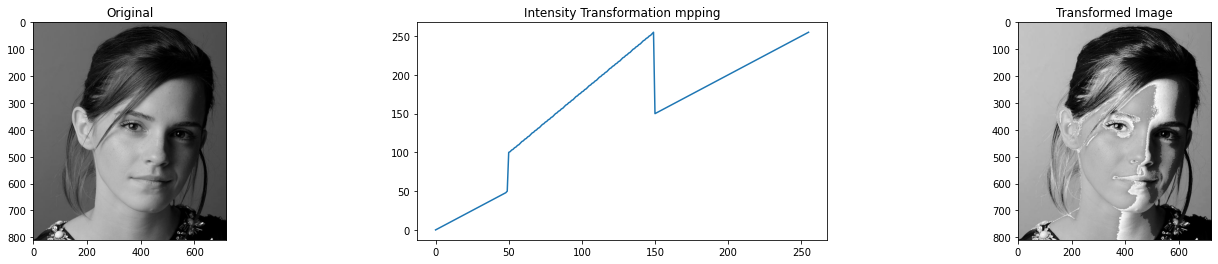

In [2]:
image=cv.imread('emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert image is not None

map1=np.linspace(0,50,50)
map2=np.linspace(100,255,100)
map3=np.linspace(150,255,106)
full_map=np.concatenate((map1,map2,map3),axis=0).astype(np.uint8)

transformed=full_map[image]

fig,ax=plt.subplots(1,3,figsize=(25,4))
ax[0].imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
ax[1].plot(full_map)
ax[2].imshow(cv.cvtColor(transformed,cv.COLOR_BGR2RGB))

title1='Original'
title2='Intensity Transformation mpping'
title3='Transformed Image'

ax[0].set_title(title1)
ax[1].set_title(title2)
ax[2].set_title(title3)

$
\Huge Q2
$

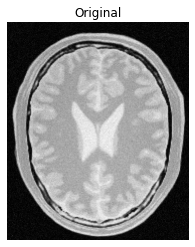

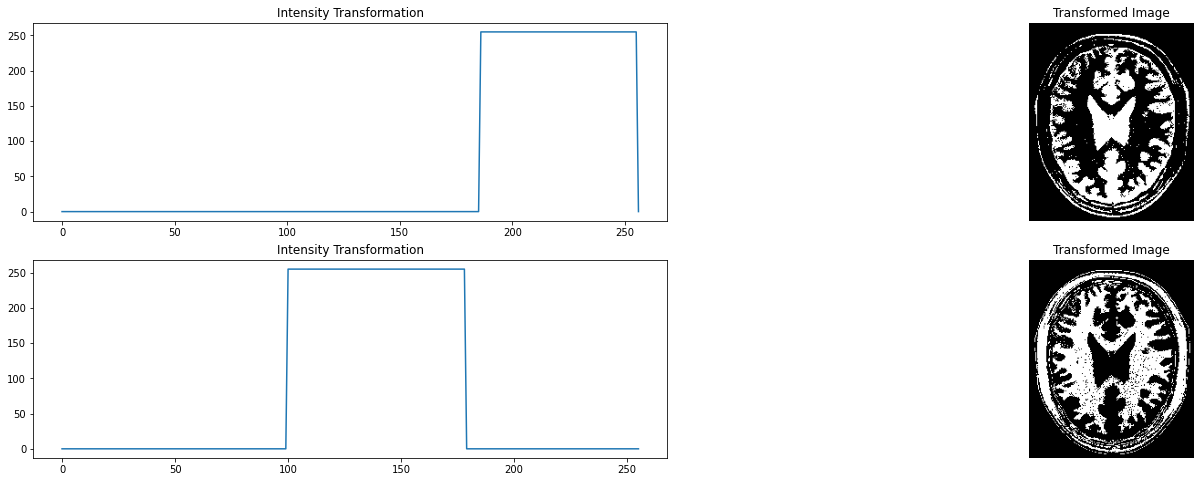

In [3]:
im=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert im is not None

fig,ax=plt.subplots(1,1,figsize=(8,4))
ax.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
Text='Original'
ax.set_title(Text)
ax.axis('off')
k=186
t1=np.linspace(0,0,k)
t2=np.linspace(255,255,256-k)
t3=np.linspace(0,0,1)
t=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
im_1=t[im]
fig,ax=plt.subplots(2,2,figsize=(25,8))
#ax[0][0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0][0].plot(t)
ax[0][1].imshow(cv.cvtColor(im_1,cv.COLOR_BGR2RGB))
#Text='Original'
Text1='Intensity Transformation'
Text2='Transformed Image'
#ax[0][0].set_title(Text)
ax[0][0].set_title(Text1)
ax[0][1].set_title(Text2)
k1=100
k2=77
t1=np.linspace(0,0,k1)
t2=np.linspace(255,255,256-k1-k2)
t3=np.linspace(0,0,k2)
t_new=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
im_2=t_new[im]
#ax[1][0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[1][0].plot(t_new)
ax[1][1].imshow(cv.cvtColor(im_2,cv.COLOR_BGR2RGB))
#ax[1][0].set_title(Text)
ax[1][0].set_title(Text1)
ax[1][1].set_title(Text2)
for i in range(2):
    ax[i][1].axis('off')
        

$
\Huge Q3
$

(-0.5, 719.5, 479.5, -0.5)

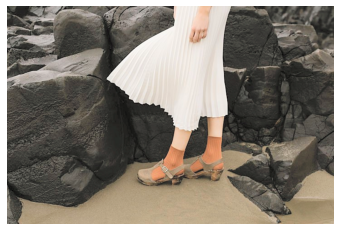

In [4]:
gamma=2
im=cv.imread("highlights_and_shadows.jpg")
Lab=cv.cvtColor(im,cv.COLOR_BGR2Lab)
Lab[:,:,0]=(Lab[:,:,0]/255)**(1/gamma)*255
plt.subplot()
plt.imshow(cv.cvtColor(Lab,cv.COLOR_Lab2RGB))
plt.axis("off")

$
\Huge Q4
$

Text(0.5, 1.0, 'Equalized image')

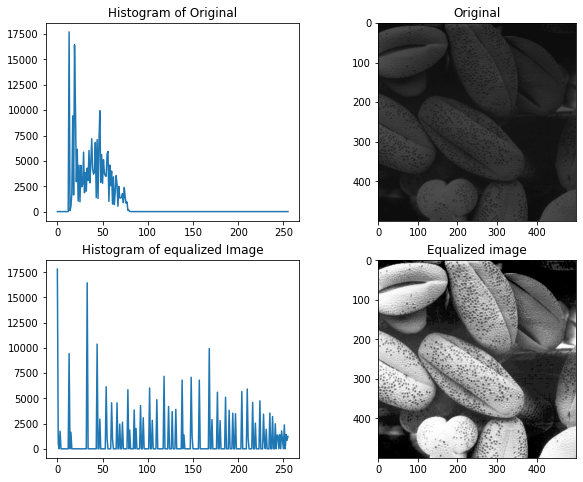

In [5]:
f=cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None
hist_f=cv.calcHist([f],[0],None,[256],[0,256])
g=cv.equalizeHist(f)
hist_g=cv.calcHist([g],[0],None,[256],[0,256])
fig,ax=plt.subplots(2,2,figsize=(10,8))
t00='Histogram of Original'
t10='Histogram of equalized Image'
t01='Original'
t11='Equalized image'
ax[0][0].plot(hist_f)
ax[1][0].plot(hist_g)
ax[0][1].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[0][0].set_title(t00)
ax[1][0].set_title(t10)
ax[0][1].set_title(t01)
ax[1][1].set_title(t11)

$
\Huge Q5
$

Text(0.5, 1.0, 'Zoomed Image')

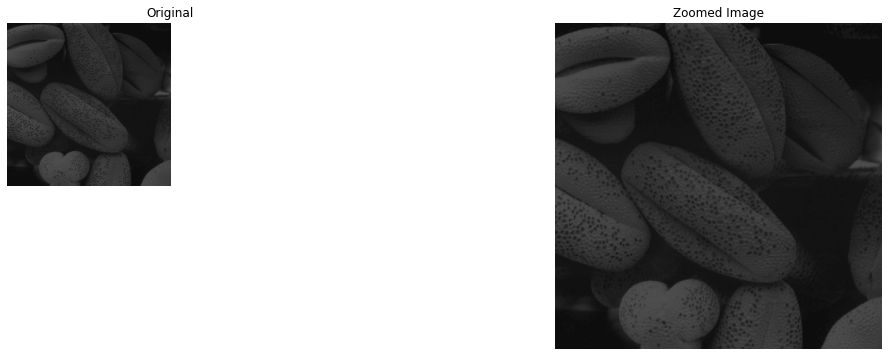

In [6]:
Scaling_Factor=2
im=cv.imread("shells.png")
rows=im.shape[0]*Scaling_Factor
cols=im.shape[1]*Scaling_Factor
zoomed=np.zeros((rows,cols,3),im.dtype)
def ScaledCods(i,j,scale):
    return int(i/scale),int(j/scale)
for i in range(rows):
    for j in range(cols):
        Scaled_i,Scaled_j=ScaledCods(i,j,Scaling_Factor)
        zoomed[i][j]=im[Scaled_i][Scaled_j]
        
fig,ax = plt.subplots(1,2,figsize =[18, 6],sharey=True,sharex=True)

ax[0].imshow(im)
ax[1].imshow(zoomed)
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('Original')
ax[1].set_title('Zoomed Image')

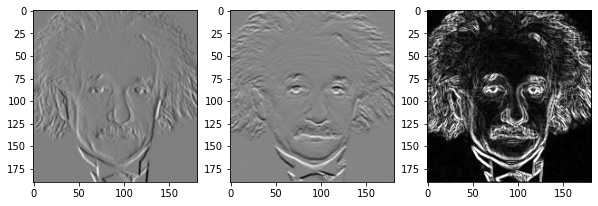

In [7]:
im=cv.imread("einstein.png",cv.IMREAD_REDUCED_GRAYSCALE_2)
gray = im

grad_x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
grad_y = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
fig,ax=plt.subplots(1,3,figsize=(10,8))
ax[0].imshow(grad_x,cmap='gray')
ax[1].imshow(grad_y,cmap='gray')
ax[2].imshow(grad,cmap='gray')


$
\Huge Q6
$

Text(0.5, 1.0, 'Gradient magnitude image')

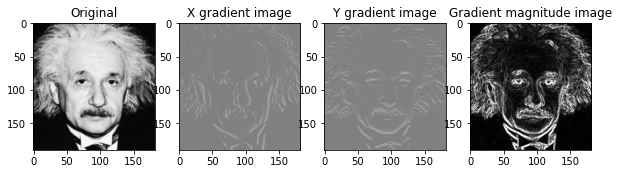

In [8]:
im=cv.imread("einstein.png",cv.IMREAD_REDUCED_GRAYSCALE_2)
kernel_x=np.array([(1,0,-1),(2,0,-2),(1,0,-1)])
kernel_y=np.array([(1,2,1),(0,0,0),(-1,-2,-1)])
x_im=cv.filter2D(im,-1,kernel_x)
y_im=cv.filter2D(im,-1,kernel_y)
Grad_mag=cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
fig,ax=plt.subplots(1,4,figsize=(10,8))
t00='Original'
t10='X gradient image'
t01='Y gradient image'
t11='Gradient magnitude image'
ax[0].imshow(im,cmap='gray')
ax[1].imshow(x_im,cmap='gray',vmin=-1020,vmax=1020)
ax[2].imshow(y_im,cmap='gray',vmin=-1020,vmax=1020)
ax[3].imshow(Grad_mag,cmap='gray')
ax[0].set_title(t00)
ax[1].set_title(t10)
ax[2].set_title(t01)
ax[3].set_title(t11)


Text(0.5, 1.0, 'Gradient magnitude image')

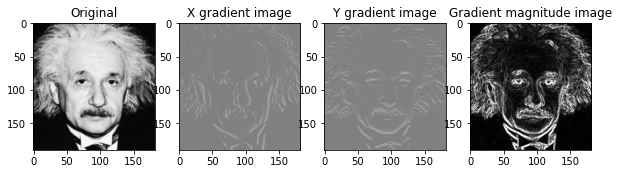

In [9]:
A=np.array([[1,2,1]]).T
B=np.array([[1,0,-1]])
kernel_x=np.matmul(A,B)
kernel_y=np.matmul(B.T,A.T)
x_im=cv.filter2D(im,-1,kernel_x)
y_im=cv.filter2D(im,-1,kernel_y)
Grad_mag=cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
fig,ax=plt.subplots(1,4,figsize=(10,8))
t00='Original'
t10='X gradient image'
t01='Y gradient image'
t11='Gradient magnitude image'
ax[0].imshow(im,cmap='gray')
ax[1].imshow(x_im,cmap='gray',vmin=-1020,vmax=1020)
ax[2].imshow(y_im,cmap='gray',vmin=-1020,vmax=1020)
ax[3].imshow(Grad_mag,cmap='gray')
ax[0].set_title(t00)
ax[1].set_title(t10)
ax[2].set_title(t01)
ax[3].set_title(t11)


$
\Huge Q7
$

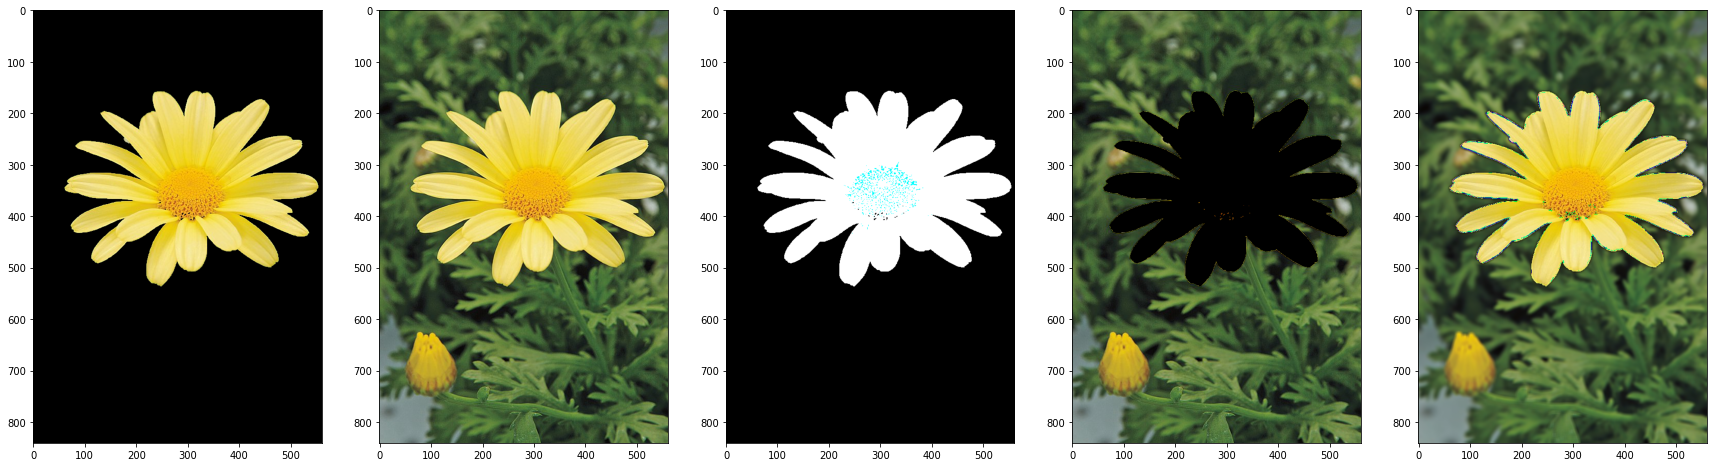

In [10]:
Sigma=20
im=cv.imread("daisy.jpg")
im1=im
mask=np.zeros(im.shape[:2],np.uint8)
background=np.zeros((1,65),np.float64)
foreground=np.zeros((1,65),np.float64)
rect=(40,150,600,450)
cv.grabCut(im,mask,rect,background,foreground,10,cv.GC_INIT_WITH_RECT)
mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
im = im * mask2[:, :, np.newaxis]
Seg_mask=np.where(im>0,255,0).astype('uint8')
neg_Seg_mask=im1-im
blured=cv.GaussianBlur(neg_Seg_mask,(7,7),Sigma)+im
#print(im[300][300:450])
fig,ax=plt.subplots(1,5,figsize=(30,16))
t00='Histogram of Original'
t10='Histogram of equalized Image'
t01='Original'
t11='Equalized image'
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[2].imshow(Seg_mask)#cv.cvtColor(Seg_mask)),cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(neg_Seg_mask,cv.COLOR_BGR2RGB),vmin=0,vmax=255)
ax[4].imshow(cv.cvtColor(blured,cv.COLOR_BGR2RGB))